## Growth binary results special cases

This notebook holds the plots created for special tests (comparison of 24h to 48h, etc.) which can't be plotted with the generalized script.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from PARAMS import *
from scipy.stats import ttest_ind
%run -i PARAMS.py
from statannotations.Annotator import Annotator

### Preliminary tests to compare transfer methods

Plain CGXII without PCA.

In [44]:
test = pd.read_excel('../data/raw/preliminary_tests.xlsx', sheet_name='CGXlab')
test['fold'] = test[24] / test[0]
test = test.astype({'strain': 'str'})
test['strain'].replace(STRAINS_LAB, inplace=True)
test

,strain,modus,0,24,growth,growth-%,fold
0,TS,direkt,0.085,0.149,0.064,75.294118,1.752941
1,1197,direkt,0.071,0.090,0.019,26.760563,1.267606
2,1115,direkt,0.071,0.080,0.009,12.676056,1.126761
3,1116,direkt,0.077,0.080,0.003,3.896104,1.038961
4,TS,centrifuged,0.139,0.206,0.067,48.201439,1.482014
5,1197,centrifuged,0.121,0.160,0.039,32.231405,1.322314
6,1115,centrifuged,0.131,0.181,0.050,38.167939,1.381679
7,1116,centrifuged,0.138,0.169,0.031,22.463768,1.224638
8,TS,log-transfer,0.162,0.371,0.209,129.012346,2.290123
9,1197,log-transfer,0.056,0.086,0.030,53.571429,1.535714


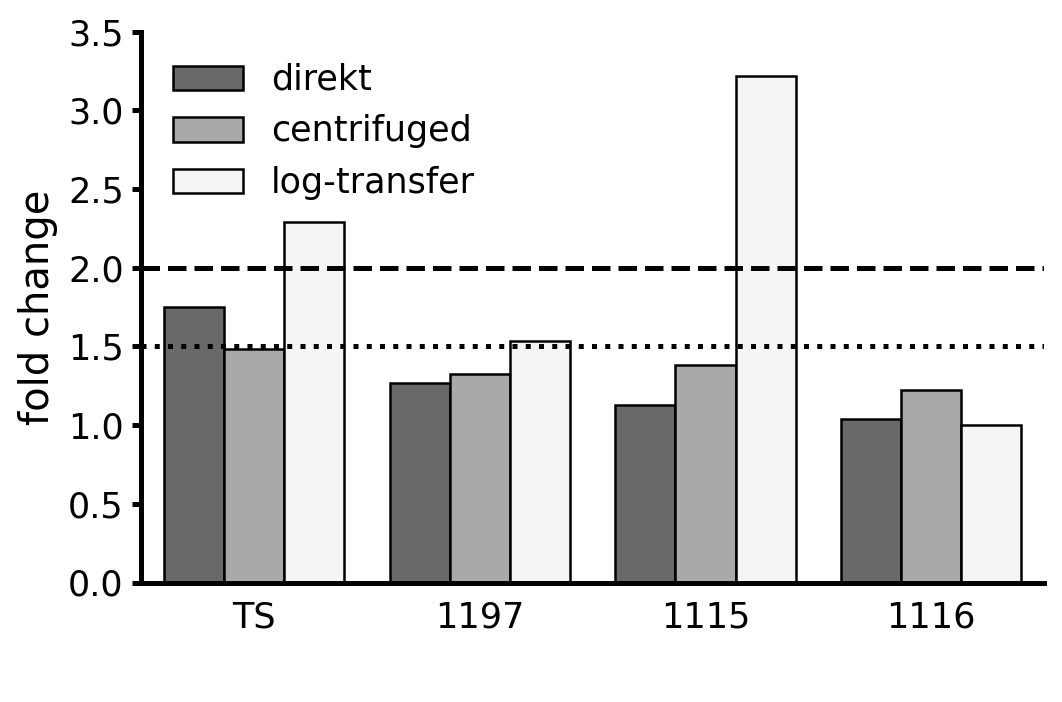

In [50]:
plt.close('all')
res = test[['strain', 'modus', 'fold']]
ax = sns.barplot(x=res['strain'], y=res['fold'], data=res, hue="modus",
                 edgecolor='k', color='white')
for i,thisbar in enumerate(ax.patches):
    #thisbar.set_hatch(pat[i])
    thisbar.set_color(greys[i])
    thisbar.set_edgecolor('k')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.tick_params(bottom=False)
plt.ylabel(r'fold change')
plt.xlabel(' ')
plt.ylim((0,3.5))
plt.legend()#handleheight=2.2, handlelength=4, loc='upper left')
plt.tight_layout()
plt.savefig('../figures/special_screening/CGXII_screen_221019.png')

### Comparison of 24h of growth to 48h of growth

In [9]:
h_24 = pd.read_csv('../data/raw/2022-11-16_CGXII_all.csv')
h_48 = pd.read_csv('../data/raw/2022-11-17_CGXII_all.csv')
h_24

,short,14-1,14-2,14-3,15-1,15-2,15-3,16-1,16-2,16-3,17-1,17-2,17-3
0,+/-,0.153,0.160,0.135,0.057,0.076,0.071,0.128,0.174,0.135,0.080,0.081,0.083
1,+/+,0.128,0.195,0.156,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.069,0.048
2,+/++,NaN,NaN,NaN,0.199,0.149,0.198,0.112,0.100,0.111,NaN,NaN,NaN


In [ ]:
plt.close('all')
for strain in ['14', '15', '16', '17']:
    fig, ax = plt.subplots()
    h_1 = h_24[['short', strain +'-1', strain +'-2', strain +'-3']].dropna()
    h_2 = h_48[['short', strain +'-1', strain +'-2', strain +'-3']].dropna()
    h_1['mean'] = h_1.mean(axis=1)
    h_1_err = h_1.std(axis=1)
    h_2['mean'] = h_2.mean(axis=1)
    h_2_err = h_2.std(axis=1)
    ax.set_ylim((0,0.25))
    plt.tick_params(bottom=False)
    h_1.plot.bar('short','mean', yerr=h_1_err.values, rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],#'white',
                legend=False, ax=ax, position=1, width=0.35, label='24h')
    h_2.plot.bar('short','mean', yerr=h_2_err.values, rot=0, 
                edgecolor='k', #hatch=pat[0], 
                color=greys[8],#'white',
                legend=False, ax=ax, position=0, width=0.35, label='48h')
    plt.legend()#handleheight=2.5, handlelength=4, loc='upper left')
    plt.xlim((-0.5, len(h_1)-0.5))
    #plt.title(strain)
    plt.ylabel(r'OD$_{600}$')
    plt.xlabel('')
    plt.tight_layout()
    plt.savefig('figures/special_screening/CGXII_time_' + strain + '_221117.png')

In [35]:
new = pd.DataFrame(h_24.set_index('short').sort_index().T.stack()).reset_index().rename({0:'OD'}, axis=1)
new['time'] = 24
new[['strain', 'sample']] = new.level_0.str.split('-', expand=True)
new2 = pd.DataFrame(h_48.set_index('short').sort_index().T.stack()).reset_index().rename({0:'OD'}, axis=1)
new2['time'] = 48
new2[['strain', 'sample']] = new2.level_0.str.split('-', expand=True)
new = new.append(new2)
new.replace(STRAINS_LAB, inplace=True)
new.head()

,level_0,short,OD,time,strain,sample
0,14-1,+/+,0.128,24,TS,1
1,14-1,+/-,0.153,24,TS,1
2,14-2,+/+,0.195,24,TS,2
3,14-2,+/-,0.160,24,TS,2
4,14-3,+/+,0.156,24,TS,3


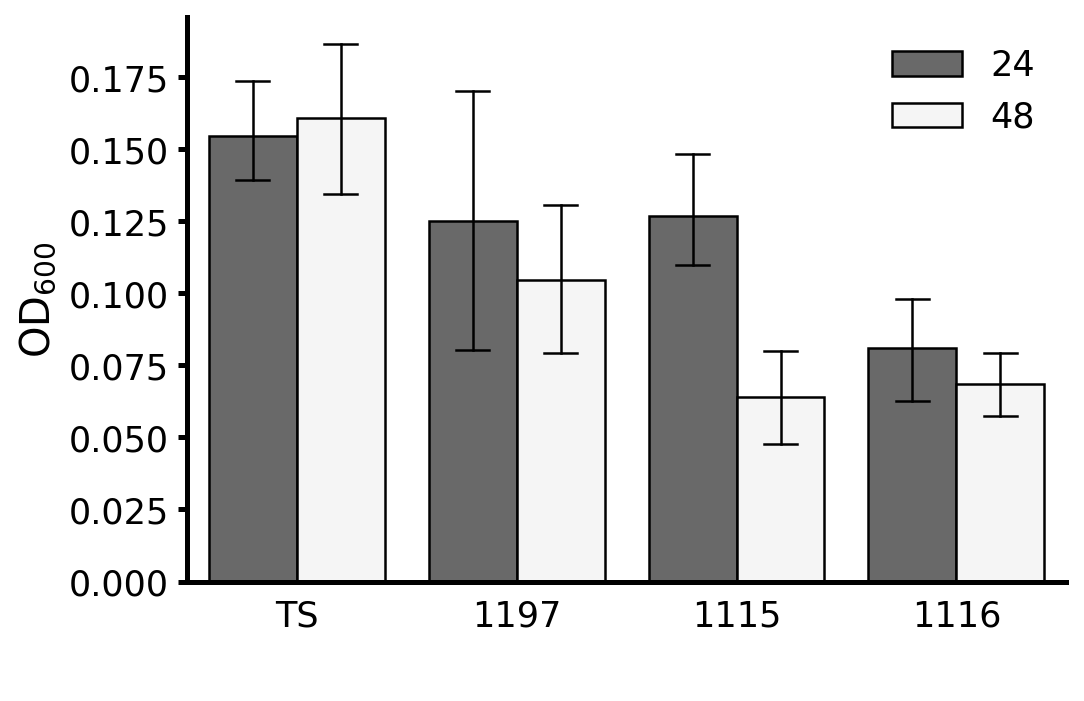

In [52]:
plt.close('all')
ax = sns.barplot(x=new['strain'], y=new['OD'], data=new, hue="time",
                 edgecolor='k', palette=[greys[0], greys[8]],
                capsize=.15, errwidth=1, errcolor='k',)
plt.tick_params(bottom=False)
plt.ylabel(r'OD$_{600}$')
plt.xlabel(' ')
plt.legend()#handleheight=2.2, handlelength=4, loc='upper left')
plt.tight_layout()
plt.savefig('../figures/special_screening/CGXII_time_221117.png')

### Comparison of different starting ODs and Tween

CGXII is supplemented with cobalt. 

23.11.22: Tween at concentration 0.2% and a starting OD of 0.1

In [92]:
res = pd.read_csv('../data/raw/2022-11-23_CGXII_allNoRep.csv')
strains = ['14', '15', '16', '17']
for strain in strains:
    res[strain] = res[strain+'-24'] / res[strain+'-0']
    
folds = res[strains].T
folds.columns = res['mode']
folds.reset_index(inplace=True)
folds['index'].replace(STRAINS_LAB, inplace=True)
folds.rename({'index': 'strain'}, axis=1, inplace=True)
folds

mode,strain,dir-0dot1,dir-0dot3,dir-0dot1-Tween,log-0dot1,log-0dot3,log-0dot1-Tween
0,TS,0.400000,inf,1.606383,0.484536,1.554745,2.666667
1,1197,0.000000,0.611765,0.443396,0.577778,0.857143,1.185841
2,1115,0.594828,1.234421,0.689655,0.138298,1.723127,1.447368
3,1116,0.000000,0.611296,0.611111,0.000000,0.468992,0.573913


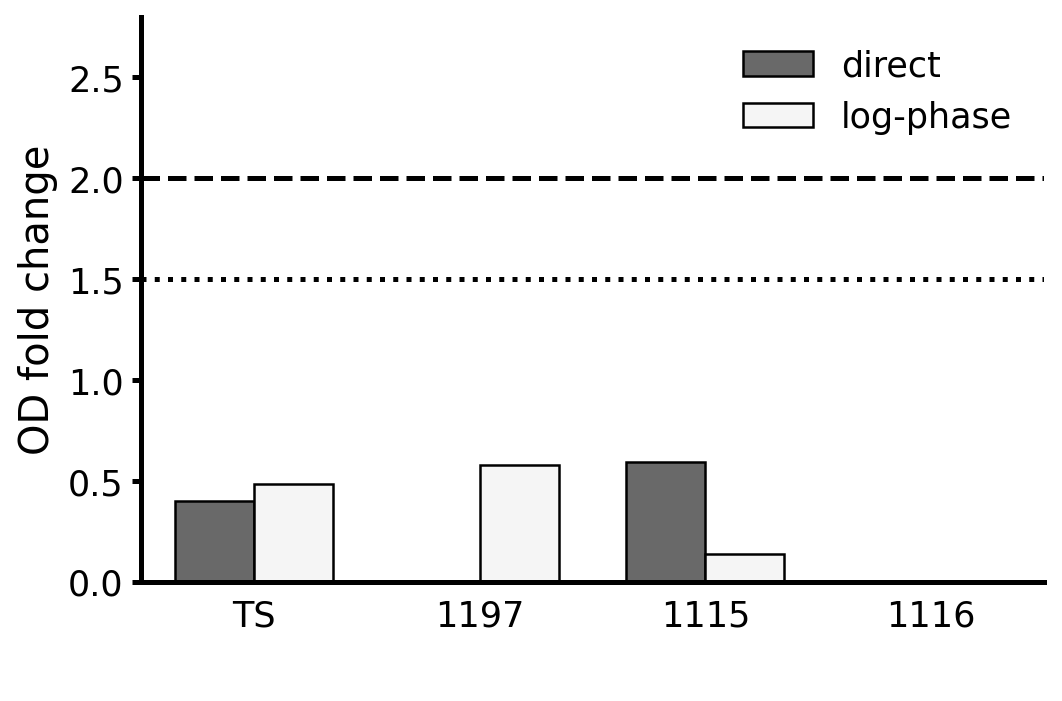

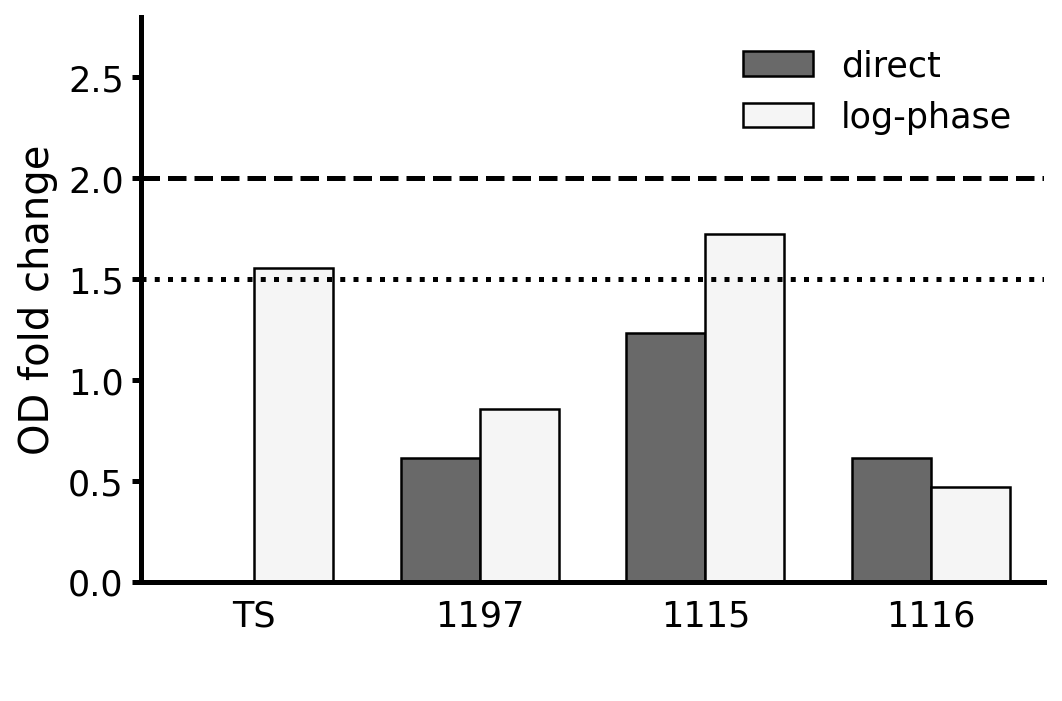

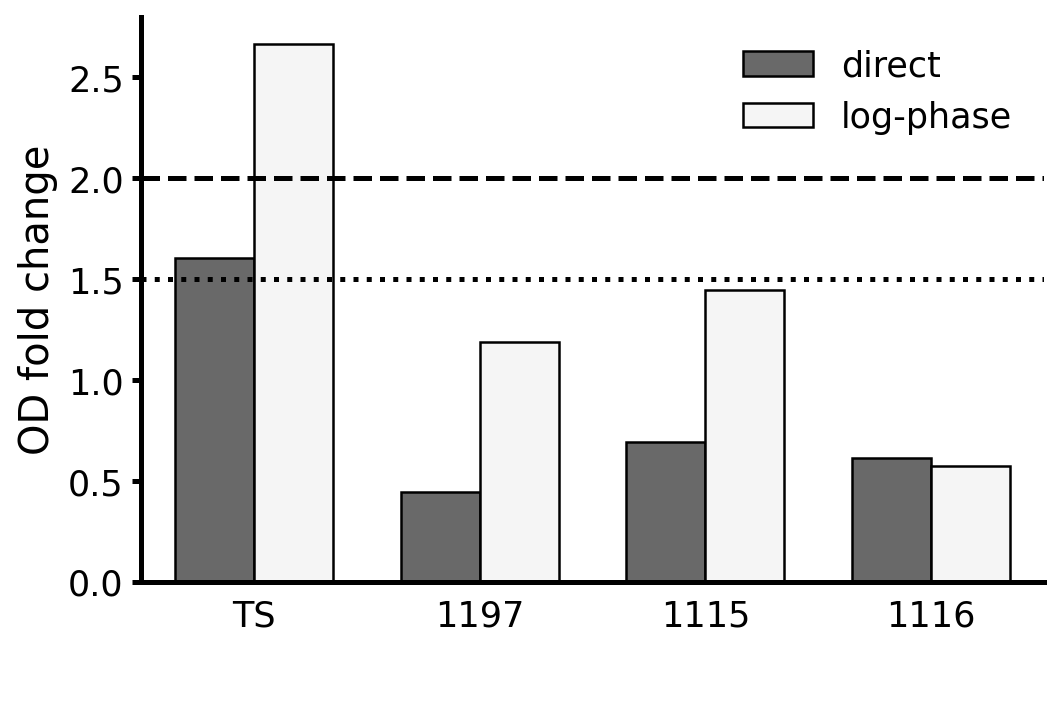

In [93]:
plt.close('all')
for modus in ['-0dot1', '-0dot3', '-0dot1-Tween']:
    fig, ax = plt.subplots()
    vis = folds[['strain', 'dir'+modus, 'log'+modus]].rename({'dir'+modus:'direct','log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('strain', 'direct', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],
                legend=False, ax=ax, position=1, width=0.35)
    vis.plot.bar('strain', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, position=0, width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    plt.ylim((0,2.8))
    plt.ylabel(r'OD fold change')
    plt.xlabel(' ')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('../figures/special_screening/CGXII_transfer_' + modus[1:] + '_221123.png')

### Comparison of different transfer methods

CGXII is supplemented with cobalt.

In [94]:
res = pd.read_csv('../data/raw/2022-11-24_CGXII_allNoRep.csv')
strains = ['14', '15', '16', '17']
for strain in strains:
    res[strain] = res[strain+'-24'] / res[strain+'-0']
    
folds = res[strains].T
folds.columns = res['mode']
folds.reset_index(inplace=True)
folds['index'].replace(STRAINS_LAB, inplace=True)
folds.rename({'index': 'strain'}, axis=1, inplace=True)
folds

mode,strain,dir-0dot1-noC,log-0dot2,log-0dot4,log-0dot1-noC
0,TS,0.522936,1.489011,2.036111,2.191176
1,1197,0.401869,1.005780,1.009063,0.323944
2,1115,0.862745,1.440415,2.088773,5.134146
3,1116,0.000000,0.152542,1.112500,1.041667


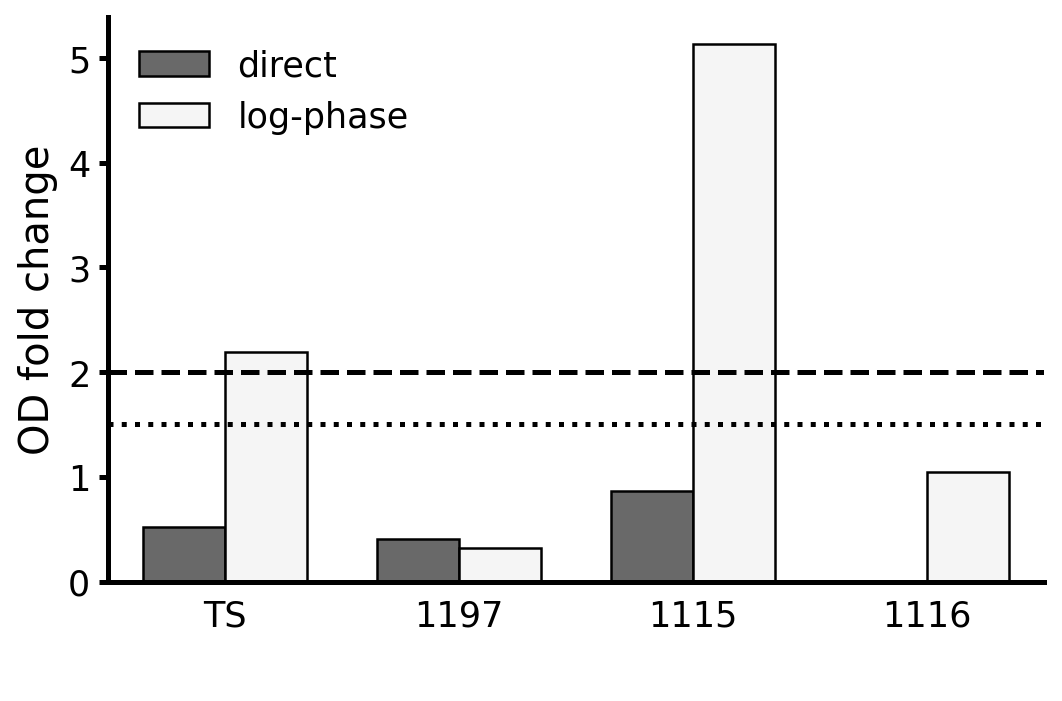

In [95]:
plt.close('all')
for modus in ['-0dot1-noC']: #-0dot2', '-0dot4', 
    fig, ax = plt.subplots()
    vis = folds[['strain', 'dir'+modus, 'log'+modus]].rename({'dir'+modus:'direct','log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('strain', 'direct', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],
                legend=False, ax=ax, position=1, width=0.35)
    vis.plot.bar('strain', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, position=0, width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    #plt.ylim((0,2.8))
    plt.ylabel(r'OD fold change')
    plt.xlabel(' ')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('../figures/special_screening/CGXII_transfer_' + modus[1:] + '_221124.png')

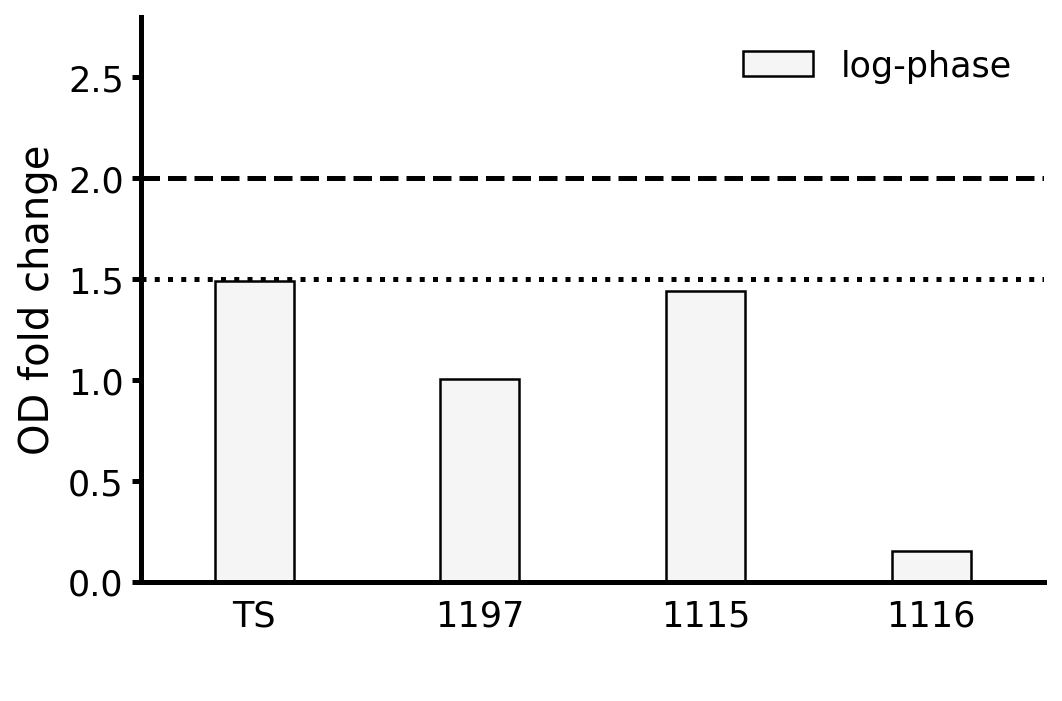

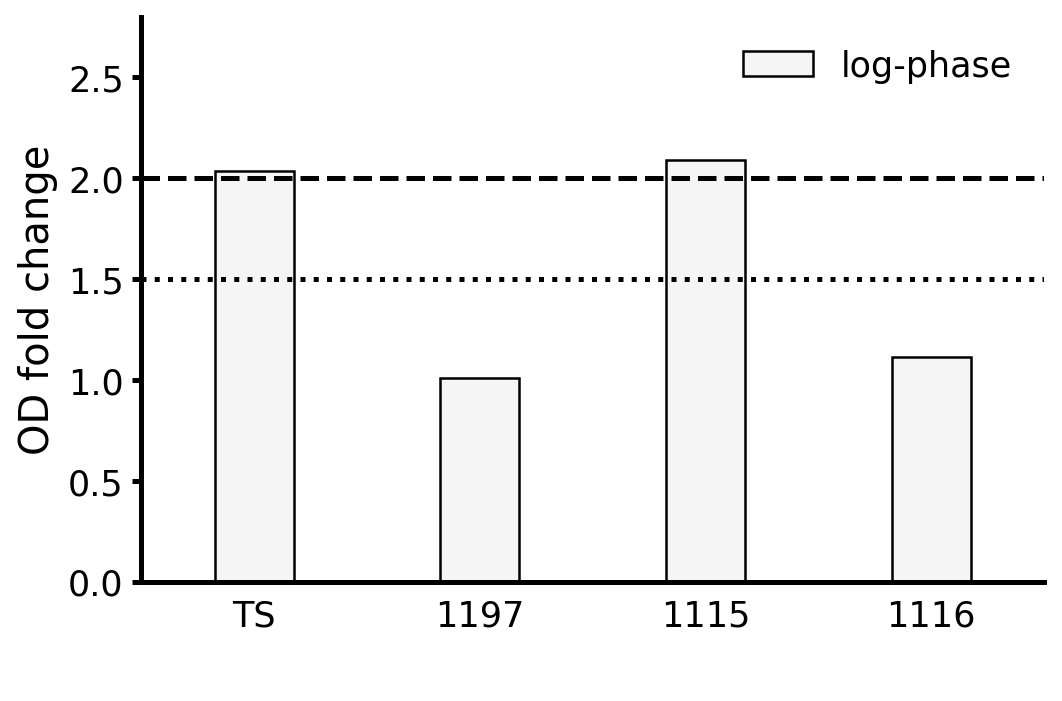

In [96]:
for modus in ['-0dot2', '-0dot4']:
    fig, ax = plt.subplots()
    vis = folds[['strain','log'+modus]].rename({'log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('strain', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, 
                #position=0, 
                width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    plt.ylim((0,2.8))
    plt.ylabel(r'OD fold change')
    plt.xlabel(' ')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('../figures/special_screening/CGXII_transfer_' + modus[1:] + '_221124.png')

### Wide screening with Trace elements, Saccharose and Casamino acids

In [97]:
wide = pd.read_csv('../data/raw/2023-01-24_CGXII_15.csv')
strain = '15'
wide

FileNotFoundError: [Errno 2] No such file or directory: 'data/2023-01-24_CGXII_15.csv.csv'

In [ ]:
fig, ax = plt.subplots()
exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                    strain +'-0-2': strain + '-2',
                    strain +'-0-3': strain + '-3'}, axis=1)
exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                    strain +'-24-2': strain + '-2',
                    strain +'-24-3': strain + '-3'}, axis=1)
exp_fold = exp_24.div(exp_0)
exp_fold['short'] = wide[['short']]
exp_fold['mean'] = exp_fold.mean(axis=1)
exp_fold['median'] = exp_fold.drop('mean', axis=1).median(axis=1)
err = exp_fold.drop(['mean','median'], axis=1).std(axis=1)
exp_fold.drop(['mean','median'], axis=1).plot(ax=ax,style='x')
exp_fold[['mean','median']].plot(ax=ax,style="_",ms=25)
exp_fold.plot.bar('short','mean',color='white', rot=0, edgecolor='white', legend=False, ax=ax)
#plt.errorbar(exp_fold['short'],exp_fold['mean'], color='k', yerr=err, fmt='none')
ax.set_zorder(1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.ylabel(r'OD fold change')
plt.xlabel('')
#ax.set_ylim((0,10.5))
plt.tick_params(bottom=False)
plt.tight_layout()
plt.savefig('figures/special_screening/CGXII_'+ strain + '_230124.png')

In [ ]:
fig, ax = plt.subplots()
exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                    strain +'-0-2': strain + '-2',
                    strain +'-0-3': strain + '-3'}, axis=1)
exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                    strain +'-24-2': strain + '-2',
                    strain +'-24-3': strain + '-3'}, axis=1)
exp_fold = exp_24.div(exp_0)
exp_fold['short'] = wide[['short']]
exp_fold['mean'] = exp_fold.mean(axis=1)
exp_fold['median'] = exp_fold.drop('mean', axis=1).median(axis=1)
err = exp_fold.drop(['mean','median'], axis=1).std(axis=1)
#exp_fold.drop(['mean','median'], axis=1).plot(ax=ax,style='x')
#exp_fold[['mean','median']].plot(ax=ax,style="_",ms=25)
exp_fold.plot.bar('short','mean',color=greys[8], edgecolor='k', rot=0, legend=False, ax=ax)
plt.errorbar(exp_fold['short'],exp_fold['mean'], color='k', yerr=err, fmt='none')
ax.set_zorder(1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.ylabel(r'OD fold change')
plt.xlabel('')
#ax.set_ylim((0,10.5))
plt.tick_params(bottom=False)
plt.tight_layout()
#plt.savefig('figures/special_screening/CGXII_'+ strain + '_230124.png')

## Manual tests

In [ ]:
man = pd.read_csv('data/2022-10-19_M9-CGXII_allNoRep.csv')
strains = ['14', '15', '16', '17']
for strain in strains:
    man[strain] = man[strain+'-24'] / man[strain+'-0']
man.set_index('medium')[strains].plot.bar()
plt.axhline(2, linestyle='dashed', color='k')
plt.xticks(rotation=0)
plt.tick_params(bottom=False)

# Test on M9

In [ ]:
wide = pd.read_csv('data/2023-02-03_M9_all.csv')
wide

In [ ]:
strains = ['14', '15', '16', '17']
all = {}
err = {}
for strain in strains:
    exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
    exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
    exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                        strain +'-0-2': strain + '-2',
                        strain +'-0-3': strain + '-3'}, axis=1)
    exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                        strain +'-24-2': strain + '-2',
                        strain +'-24-3': strain + '-3'}, axis=1)
    exp_fold = exp_24.div(exp_0)
    all[strain] = exp_fold.mean(axis=1)
    err[strain] = exp_fold.std(axis=1)
all = pd.DataFrame.from_dict(all).rename({0:'M9', 1:'+CasA'}, axis=0)
err = pd.DataFrame.from_dict(err).rename({0:'M9', 1:'+CasA'}, axis=0)
all.T.plot.bar(yerr=err.T, color={'M9':greys[8],'+CasA':greys[0]}, edgecolor='k')
plt.xticks(rotation=0, rotation_mode='anchor')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.ylabel(r'OD fold change')
plt.xlabel('')
plt.tick_params(bottom=False)
plt.legend(ncol=2)
plt.tight_layout()

## T-test in Python

Student's t tests were used to calculate the significance: ns= not significant, * P <0.05, ** P <0.01, *** P <0.001. 

In [ ]:
from scipy.stats import ttest_ind

for strain in strains:
    exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
    exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
    exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                        strain +'-0-2': strain + '-2',
                        strain +'-0-3': strain + '-3'}, axis=1)
    exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                        strain +'-24-2': strain + '-2',
                        strain +'-24-3': strain + '-3'}, axis=1)
    exp_fold = exp_24.div(exp_0)
    t_stat, p = ttest_ind(exp_fold.loc[0],exp_fold.loc[1])
    print(strain, f't={t_stat}, p={p}')

There is a Python tool called `statannotations` which uses scipy.stats for the calculations and simplifies adding significance bars to seaborn plots.

The first step is to transform the `.csv` data into a pandas Dataframe that can be used for seaborn plotting and statistics. I reordered the Dataframe and split the sample description so that we end up with strain, time point and sample information in three different columns. From there we can bild two dataframes: one for time point 0 and one for time point 24 hours. The OD values can be divided so that we end up with a Dataframe holding the information on OD fold changes. This way we also wont have to worry about error calculation since the error is inferred from the fold change and not from averaging before.

In [ ]:
# data preparation
new = pd.DataFrame(wide.set_index('short').sort_index().T.stack()).reset_index().rename({0:'OD'}, axis=1)
new[['strain', 'time', 'sample']] = new.level_0.str.split('-', expand=True)
time = [v for k, v in new.groupby('time')]
change = time[1]
change['OD fold change'] = time[1]['OD'].values / time[0]['OD'].values
change

In [ ]:
# input
data=change
hue = 'short'
hue_order = ['M9', '+CasA']
x='strain'
y='OD fold change'

# barplot
ax = sns.barplot(data=data, x=x, y=y, hue=hue, 
                 estimator=np.mean, 
                 hue_order=hue_order,
                 palette=[greys[8], greys[0]], edgecolor='k',
                 capsize=.15, errwidth=1, errcolor='k')

# statistics
pairs = []
pairs = pairs + [((strain, 'M9'), (strain, '+CasA'))
                for strain in strains]
#pairs = pairs + [(('14', '+CasA'), ('16','+CasA'))]
annotator = Annotator(ax, pairs, data=data, x=x, y=y, hue=hue, hue_order=hue_order)
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_test().annotate()

# styling
ax.legend(title=None, ncol=2)
ax.tick_params(bottom=False) 
ax.axhline(2, linestyle='dashed', color='k')
#ax.axhline(1.5, linestyle=':', color='k')

# saving
plt.tight_layout()
plt.savefig('figures/plots_with_stats/M9_cas.png')

In [ ]:
plt.close('all')